## 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響

常見的 optimizer 包含

SGD

RMSprop

AdaGrad

Adam

https://keras.io/optimizers/

https://keras.io/zh/optimizers/

In [1]:
import os
import keras

# GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.


## SGD

keras.optimizers.SGD(lr=0.01, momentum=0.0, decay=0.0, nesterov=False)

W0721 15:05:13.285616 4580169152 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0721 15:05:13.321435 4580169152 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0721 15:05:13.406068 4580169152 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0721 15:05:13.408179 4580169152 deprecation_wrapper.py:119] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/keras/back

Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0721 15:05:13.713214 4580169152 deprecation.py:323] From /Users/johnsonhuang/anaconda3/envs/tensorflow/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 271us/step - loss: 1.8184 - acc: 0.3489 - val_loss: 1.6249 - val_acc: 0.4311
Epoch 2/50
50000/50000 [==============================] - 6s 111us/step - loss: 1.5916 - acc: 0.4331 - val_loss: 1.6248 - val_acc: 0.4197
Epoch 3/50
50000/50000 [==============================] - 6s 122us/step - loss: 1.5096 - acc: 0.4626 - val_loss: 1.5316 - val_acc: 0.4492
Epoch 4/50
50000/50000 [==============================] - 6s 115us/step - loss: 1.4447 - acc: 0.4877 - val_loss: 1.5122 - val_acc: 0.4494
Epoch 5/50
50000/50000 [==============================] - 6s 125us/step - loss: 1.3974 - acc: 0.5041 - val_loss: 1.4334 - val_acc: 0.4824
Epoch 6/50
50000/50000 [==============================] - 7s 134us/step - loss: 1.3537 - acc: 0.5192 - val_loss: 1.5088 - val_acc: 0.4547 1s - l
Epoch 7/50
50000/50000 [==============================] - 6s 124us/step - loss: 1.3197 - acc: 0.5311 - val_loss: 1

Epoch 2/50
50000/50000 [==============================] - 7s 132us/step - loss: 2.1485 - acc: 0.2409 - val_loss: 2.1081 - val_acc: 0.2519
Epoch 3/50
50000/50000 [==============================] - 6s 116us/step - loss: 2.0752 - acc: 0.2649 - val_loss: 2.0435 - val_acc: 0.2731
Epoch 4/50
50000/50000 [==============================] - 7s 143us/step - loss: 2.0186 - acc: 0.2882 - val_loss: 1.9944 - val_acc: 0.3040
Epoch 5/50
50000/50000 [==============================] - 8s 151us/step - loss: 1.9741 - acc: 0.3093 - val_loss: 1.9550 - val_acc: 0.3159
Epoch 6/50
50000/50000 [==============================] - 7s 135us/step - loss: 1.9394 - acc: 0.3217 - val_loss: 1.9248 - val_acc: 0.3259
Epoch 7/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.9119 - acc: 0.3322 - val_loss: 1.8997 - val_acc: 0.3298
Epoch 8/50
50000/50000 [==============================] - 9s 177us/step - loss: 1.8890 - acc: 0.3405 - val_loss: 1.8804 - val_acc: 0.3373
Epoch 9/50
50000/50000 [==========

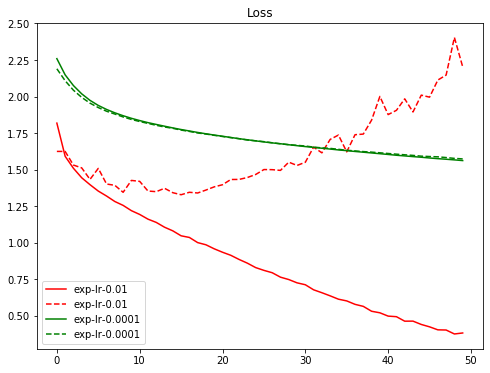

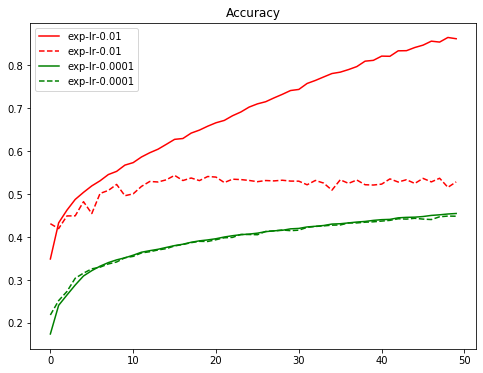

In [2]:
# optimizer : SGD

# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()



## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    




x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)




def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)

    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)

    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model




## 超參數設定
LEARNING_RATE = [1e-2, 1e-4]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95




results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉

    # different lr
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()

    """# different optimizer"""
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=True, momentum=MOMENTUM)
    
    # compile
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    # fit
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}





import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## RMSprop

keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)

Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 189us/step - loss: 2.3248 - acc: 0.2174 - val_loss: 2.1261 - val_acc: 0.2496
Epoch 2/50
50000/50000 [==============================] - 10s 193us/step - loss: 1.8902 - acc: 0.3198 - val_loss: 1.9937 - val_acc: 0.2716
Epoch 3/50
50000/50000 [==============================] - 9s 187us/step - loss: 1.7833 - acc: 0.3578 - val_loss: 1.8778 - val_acc: 0.3398
Epoch 4/50
50000/50000 [==============================] - 9s 181us/step - loss: 1.7135 - acc: 0.3879 - val_loss: 1.8488 - val_acc: 0.3421
Epoch 5/50
50000/50000 [==============================] - 9s 185us/step - loss: 1.6506 - acc: 0.4084 - val_loss: 1.7221 - val_acc: 0.3847
Epoch 6/50
50000/50000 [==============================] - 9s 176us/step - loss: 1.6032 - acc: 0.4275 - val_loss: 1.6536 - val_acc: 0.4117
Epoch 7/50
50000/50000 [==============================] - 9s 178us/step - loss: 1.5672 - acc: 0.4382 - val_loss: 1.7214 -

50000/50000 [==============================] - 12s 246us/step - loss: 1.9645 - acc: 0.2916 - val_loss: 1.8145 - val_acc: 0.3589
Epoch 2/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.7882 - acc: 0.3617 - val_loss: 1.8364 - val_acc: 0.3204
Epoch 3/50
50000/50000 [==============================] - 8s 156us/step - loss: 1.7147 - acc: 0.3910 - val_loss: 1.7813 - val_acc: 0.3604
Epoch 4/50
50000/50000 [==============================] - 8s 159us/step - loss: 1.6615 - acc: 0.4109 - val_loss: 1.6934 - val_acc: 0.3989
Epoch 5/50
50000/50000 [==============================] - 8s 162us/step - loss: 1.6154 - acc: 0.4288 - val_loss: 1.6428 - val_acc: 0.4041
Epoch 6/50
50000/50000 [==============================] - 8s 158us/step - loss: 1.5835 - acc: 0.4391 - val_loss: 1.5684 - val_acc: 0.4444
Epoch 7/50
50000/50000 [==============================] - 8s 160us/step - loss: 1.5471 - acc: 0.4553 - val_loss: 1.6210 - val_acc: 0.4209
Epoch 8/50
50000/50000 [====================

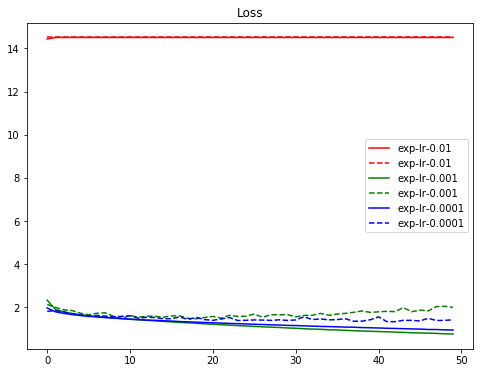

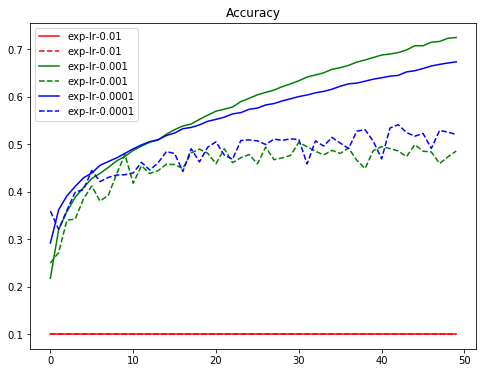

In [5]:
# optimizer : RMSprop

# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()



## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    




x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)




def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)

    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)

    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model




## 超參數設定
LEARNING_RATE = [1e-2, 1e-3, 1e-4]
EPOCHS = 50
BATCH_SIZE = 256
# MOMENTUM = 0.95




results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉

    # different lr
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()

    """# different optimizer"""
    #           keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
    optimizer = keras.optimizers.RMSprop(lr=lr, rho=0.9, epsilon=None, decay=0.0)
    
    # compile
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    # fit
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}





import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## AdaGrad

keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)

Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 25s 505us/step - loss: 2.0494 - acc: 0.2757 - val_loss: 1.9658 - val_acc: 0.3099
Epoch 2/50
50000/50000 [==============================] - 28s 570us/step - loss: 1.9291 - acc: 0.3242 - val_loss: 1.9035 - val_acc: 0.3300
Epoch 3/50
50000/50000 [==============================] - 19s 385us/step - loss: 1.8838 - acc: 0.3416 - val_loss: 1.8740 - val_acc: 0.3421
Epoch 4/50
50000/50000 [==============================] - 16s 310us/step - loss: 1.8563 - acc: 0.3508 - val_loss: 1.8478 - val_acc: 0.3532
Epoch 5/50
50000/50000 [==============================] - 14s 272us/step - loss: 1.8369 - acc: 0.3581 - val_loss: 1.8314 - val_acc: 0.3556
Epoch 6/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.8215 - acc: 0.3645 - val_loss: 1.8189 - val_acc: 0.3659
Epoch 7/50
50000/50000 [==============================] - 8s 163us/step - loss: 1.8091 - acc: 0.3682 - val_loss: 1.80

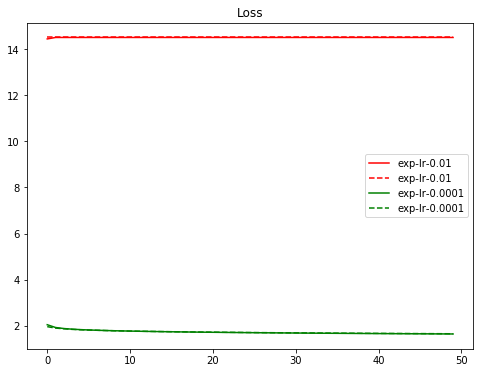

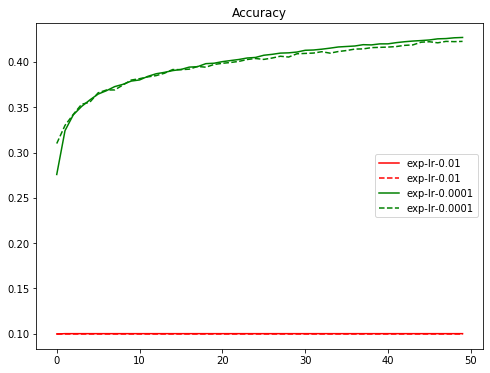

In [7]:
# optimizer : AdaGrad

# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()



## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    




x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)




def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)

    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)

    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model




## 超參數設定
LEARNING_RATE = [1e-2, 1e-4]
EPOCHS = 50
BATCH_SIZE = 256
# MOMENTUM = 0.95




results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉

    # different lr
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()

    """# different optimizer"""
#               keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
    optimizer = keras.optimizers.Adagrad(lr=lr, epsilon=None, decay=0.0)
    
    # compile
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    # fit
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}





import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## Adam

keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [============================

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 265us/step - loss: 1

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 238us/step - loss: 1.9343 - acc: 0.3125 - val_loss: 1.7763 - val_acc: 0.3745
Epoch 2/50
50000/50000 [==============================] - 8s 166us/step - loss: 1.7368 - acc: 0.3891 - val_loss: 1.6989 - val_acc: 0.3954
Epoch 3/50
50000/50000 [==============================] - 9s 180us/step - loss: 1.6569 - acc: 0.4187 - val_loss: 1.6574 - val_acc: 0.4121
Epoch 4/50
50000/50000 [==============================] - 9s 184us/step - loss: 1.6012 - acc: 0.4373 - val_loss: 1.5871 - val_acc: 0.4373
Epoch 5/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.5542 - acc: 0.4529 - val_loss: 1.5417 - val_acc: 0.4538
Epoch 6/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.5123 - acc: 0.4675 - val_loss: 1.5206 - val_acc: 0.4570
Epoch 7/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.4815 - acc: 0.4793 - val_loss: 1.494

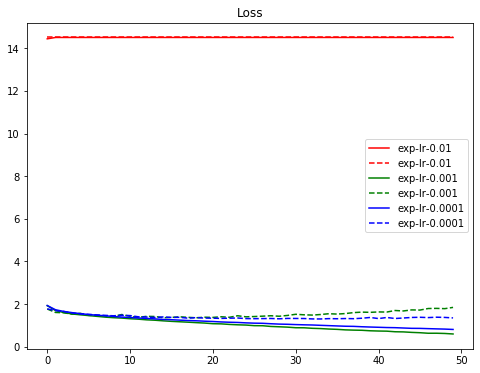

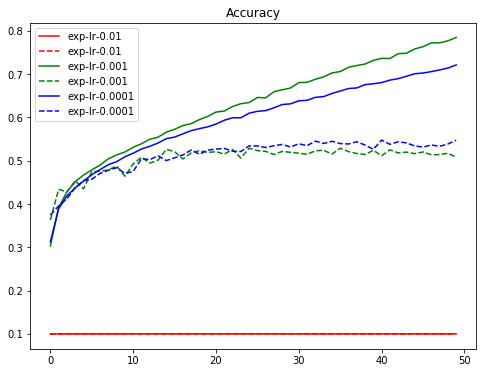

In [8]:
# optimizer : Adam

# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()



## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    




x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)




def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)

    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)

    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)

    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model




## 超參數設定
LEARNING_RATE = [1e-2, 1e-3, 1e-4]
EPOCHS = 50
BATCH_SIZE = 256
# MOMENTUM = 0.95




results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉

    # different lr
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()

    """# different optimizer"""
    #           keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    optimizer = keras.optimizers.Adam(lr=lr, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
    
    # compile
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    # fit
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]

    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}





import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

## 參考資料


## CSDN - 常見優化器方法總結：

    - SGD (mini-batch)
        - 在單步更新與全局更新的折衷辦法，通常搭配 momentum 穩定收斂方向與結果。
        - 收斂速度較慢。
        
    - RMSprop
        - 學習率的調整是根據過去梯度的狀況調整，收斂速度快又不易會出現 learning rate 快速下降的狀況。
    
    - Adam
        - 同樣是可以根據過去的梯度自行調整 learning rate，但校正方式考量一、二階矩陣，使其更加平穩。


    在實作過程中，建議先使用 Adam 驗證，若要做最終的優化，則再改用 SGD 找到最佳參數。



    
    參考連結：
![img1](http://cs231n.github.io/assets/nn3/opt2.gif)

> ![img2](http://cs231n.github.io/assets/nn3/opt1.gif)
> Image 6 shows the behaviour of the algorithms at a saddle point, i.e. a point where one dimension has a positive slope, while the other dimension has a negative slope, which pose a difficulty for SGD as we mentioned before. Notice here that SGD, Momentum, and NAG find it difficulty to break symmetry, although the two latter eventually manage to escape the saddle point, while Adagrad, RMSprop, and Adadelta quickly head down the negative slope.  As we can see, the adaptive learning-rate methods, i.e. Adagrad, Adadelta, RMSprop, and Adam are most suitable and provide the best convergence for these scenarios.
Note: If you are interested in visualizing these or other optimization algorithms, refer to [this useful tutorial](http://louistiao.me/notes/visualizing-and-animating-optimization-algorithms-with-matplotlib/).

--

## [An overview of gradient descent optimization algorithms](http://ruder.io/optimizing-gradient-descent/)

--

## [CSDN-優化器方法總結](https://blog.csdn.net/u010089444/article/details/76725843)

### 1. SGD

    > 1-1. Batch Gradient Descent

        在每一輪的訓練過程中，Batch Gradient Descent算法用整個訓練集的數據計算cost fuction的梯度，並用該梯度對模型參數進行更新：

        優點:

        cost fuction若為凸函數，能夠保證收斂到全局最優值；若為非凸函數，能夠收斂到局部最優值

        缺點:

        由於每輪迭代都需要在整個數據集上計算一次，所以批量梯度下降可能非常慢
        訓練數較多時，需要較大內存
        批量梯度下降不允許在線更新模型，例如新增實例。

        -

    > 1-2. Stochastic Gradient Descent

        和批梯度下降算法相反，Stochastic gradient descent算法每讀入一個數據，便立刻計算cost fuction的梯度來更新參數：

        優點:

        算法收斂速度快(在Batch Gradient Descent算法中, 每輪會計算很多相似樣本的梯度, 這部分是冗餘的)

        可以在線更新

        有機率跳出一個比較差的局部最優而收斂到一個更好的局部最優甚至是全局最優

        缺點:

        容易收斂到局部最優，並且容易被困在鞍點
        
        -
        
    > 1-3. Mini-batch Gradient Descent
    
        mini-batch Gradient Descent的方法是在上述兩個方法中取折衷,每次從所有訓練數據中取一個子集（mini-batch）用於計算梯度：

        Mini-batch Gradient Descent在每輪迭代中僅僅計算一個mini-batch的梯度，不僅計算效率高，而且收斂較為穩定。該方法是目前深度學訓練中的主流方法

        上述三個方法面臨的主要挑戰如下：

        - 選擇適當的學習率 α 較為困難。太小的學習率會導致收斂緩慢，而學習速度太快會造成較大波動，妨礙收斂。
        
        - 目前可採用的方法是在訓練過程中調整學習率大小，例如模擬退火算法：預先定義一個迭代次數m，每執行完m次訓練便減小學習率，或者當cost function的值低於一個閾值時減小學習率。然而迭代次數和閾值必須事先定義，因此無法適應數據集的特點。
        
        - 上述方法中, 每個參數的learning rate 都是相同的，這種做法是不合理的：如果訓練數據是稀疏的，並且不同特徵的出現頻率差異較大，那麼比較合理的做法是對於出現頻率低的特徵設置較大的學習速率，對於出現頻率較大的特徵數據設置較小的學習速率。
        
        - 近期的的研究表明，深層神經網絡之所以比較難訓練，並不是因為容易進入local minimum。相反，由於網絡結構非常複雜，在絕大多數情況下即使是local minimum 也可以得到非常好的結果。而之所以難訓練是因為學習過程容易陷入到馬鞍面中，即在坡面上，一部分點是上升的，一部分點是下降的。而這種情況比較容易出現在平坦區域，在這種區域中，所有方向的梯度值都幾乎是0。

--

### 2. Momentum

SGD方法的一個缺點是其更新方向完全依賴於當前batch計算出的梯度，因而十分不穩定。Momentum算法借用了物理中的動量概念，它模擬的是物體運動時的慣性，即更新的時候在一定程度上保留之前更新的方向，同時利用當前batch的梯度微調最終的更新方向。這樣一來，可以在一定程度上增加穩定性，從而學習地更快，並且還有一定擺脫局部最優的能力：
        
        
Momentum算法會觀察歷史梯度 $ v_{t-1} $
	
，若當前梯度的方向與歷史梯度一致（表明當前樣本不太可能為異常點），則會增強這個方向的梯度，若當前梯度與歷史梯方向不一致，則梯度會衰減。

**一種形象的解釋是：**我們把一個球推下山，球在下坡時積聚動量，在途中變得越來越快，γ可視為空氣阻力，若球的方向發生變化，則動量會衰減。

--

### 3. Nesterov Momentum

在小球向下滾動的過程中，我們希望小球能夠提前知道在哪些地方坡面會上升，這樣在遇到上升坡面之前，小球就開始減速。這方法就是Nesterov Momentum，其在凸優化中有較強的理論保證收斂。並且，在實踐中Nesterov Momentum也比單純的Momentum 的效果好：

--

### 4. Adagrad
上述方法中，對於每一個參數 的訓練都使用了相同的學習率α。Adagrad算法能夠在訓練中自動的對learning rate進行調整，對於出現頻率較低參數採用較大的α更新；相反，對於出現頻率較高的參數採用較小的α更新。因此，Adagrad非常適合處理稀疏數據。

--

### 5. RMSprop

RMSprop是Geoff Hinton提出的一種自適應學習率方法。Adagrad會累加之前所有的梯度平方，而RMSprop僅僅是計算對應的平均值，因此可緩解Adagrad算法學習率下降較快的問題。

--

### 6. Adam
Adam(Adaptive Moment Estimation)是另一種自適應學習率的方法。它利用梯度的一階矩陣估計和二階矩陣估計動態調整每個參數的學習率。Adam的優點主要在於經過偏置校正後，每一次迭代學習率都有個確定範圍，使得參數比較平穩。








